# ✏️ Esercizi {#sec-ex-optimal-scaling}

## Ottimizzazione dello scoring dei dati di questionari ordinali

Precedentemente, nell'Esercizio sulla scala Likert, abbiamo effettuato lo scoring del questionario *Strengths and Difficulties Questionnaire* (SDQ) utilizzando l'approccio chiamato "Likert scaling", in cui le categorie di risposta "non vero", "un po' vero" e "certamente vero" sono state assegnate ai numeri interi consecutivi 0-1-2. Oltre a riflettere il presunto grado crescente di accordo in queste opzioni di risposta, l'assegnazione dei numeri interi era arbitraria, poiché non c'era una particolare ragione per cui abbiamo assegnato 0-1-2 anziché, ad esempio, 1-2-3. Un tale modo arbitrario di valutare le risposte degli item è chiamato anche "measurement by fiat". In questo tutorial, cercheremo di trovare punteggi "ottimali" per le risposte ordinate al SDQ. "Ottimale" significa che i punteggi che assegniamo alle risposte non sono solo dei punteggi qualsiasi, ma sono i "migliori" tra tutti gli altri possibili punteggi in base a qualche criterio statistico.

Esistono molti modi per "ottimizzare" i punteggi degli item; qui, massimizzeremo il rapporto tra la varianza del punteggio totale e la somma delle varianze dei punteggi degli item. In psicometria, il soddisfacimento di questo criterio porta alla massimizzazione della somma delle correlazioni degli item (e quindi della "coerenza interna" del punteggio del test misurata dall'alpha di Cronbach).

In [1]:
source("../../code/_common.R")
library("aspect")

Importiamo nuovamente i dati del *Strengths and Difficulties Questionnaire* (SDQ).

In [2]:
load("../data/data_sdq/SDQ.RData")

In [4]:
glimpse(SDQ)

Rows: 228
Columns: 51
$ Gender   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ consid   <dbl> 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2…
$ restles  <dbl> 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0…
$ somatic  <dbl> 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1…
$ shares   <dbl> 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2…
$ tantrum  <dbl> 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0…
$ loner    <dbl> 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0…
$ obeys    <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2…
$ worries  <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0…
$ caring   <dbl> 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2…
$ fidgety  <dbl> 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ friend   <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2…
$ fights   <dbl> 0

Per analizzare solo gli item che misurano i Sintomi Emotivi, è conveniente creare un nuovo data frame.

In [5]:
items_emotion <- c("somatic", "worries", "unhappy", "clingy", "afraid")
sdq_emo <- SDQ[, items_emotion]
sdq_emo |>
    head()

somatic,worries,unhappy,clingy,afraid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,0,1,0
2,0,0,1,0
0,0,0,0,1
0,0,0,1,1
2,1,0,1,0
1,0,0,1,0


Affrontiamo il problema dei dati mancanti come discusso in precedenza.

In [6]:
sdq_emo <- sdq_emo %>%
    mutate_at(vars(somatic:afraid), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .))

Eliminiamo i valori decimali.

In [7]:
sdq_emo <- round(sdq_emo)

In [8]:
emotional_symptoms <- c("somatic", "worries", "unhappy", "clingy", "afraid")
result <- lapply(emotional_symptoms, function(x) sort(unique(sdq_emo[[x]])))
result |> print()

[[1]]
[1] 0 1 2

[[2]]
[1] 0 1 2

[[3]]
[1] 0 1 2

[[4]]
[1] 0 1 2

[[5]]
[1] 0 1 2



Trasformiamo il data frame in una matrice.

In [9]:
M <- sdq_emo |> as.matrix()
M

somatic,worries,unhappy,clingy,afraid
2,1,0,1,0
2,0,0,1,0
0,0,0,0,1
0,0,0,1,1
2,1,0,1,0
1,0,0,1,0
0,1,1,2,0
0,0,0,0,0
1,0,0,0,0
0,0,0,0,1


Implementiamo lo scaling ottimale con la funzione `corAspect()`.

In [10]:
opt <- corAspect(M, aspect = "aspectSum", level = "ordinal")

Esaminiamo il risultato ottenuto.

In [11]:
attributes(opt)

$names
 [1] "loss"      "catscores" "cormat"    "eigencor"  "indmat"    "scoremat" 
 [7] "data"      "burtmat"   "niter"     "call"     

$class
[1] "aspect"

In [12]:
opt$scoremat

,somatic,worries,unhappy,clingy,afraid
1,1.9720960,0.4454555,-0.6009399,0.2369782,-0.7685934
2,1.9720960,-0.8540365,-0.6009399,0.2369782,-0.7685934
3,-0.9013969,-0.8540365,-0.6009399,-1.1988603,1.0085914
4,-0.9013969,-0.8540365,-0.6009399,0.2369782,1.0085914
5,1.9720960,0.4454555,-0.6009399,0.2369782,-0.7685934
6,0.5862099,-0.8540365,-0.6009399,0.2369782,-0.7685934
7,-0.9013969,0.4454555,1.3931034,1.6170823,-0.7685934
8,-0.9013969,-0.8540365,-0.6009399,-1.1988603,-0.7685934
9,0.5862099,-0.8540365,-0.6009399,-1.1988603,-0.7685934
10,-0.9013969,-0.8540365,-0.6009399,-1.1988603,1.0085914


Esaminiamo la relazione tra lo scoring basato sul metodo Likert con lo scoring ottimale.

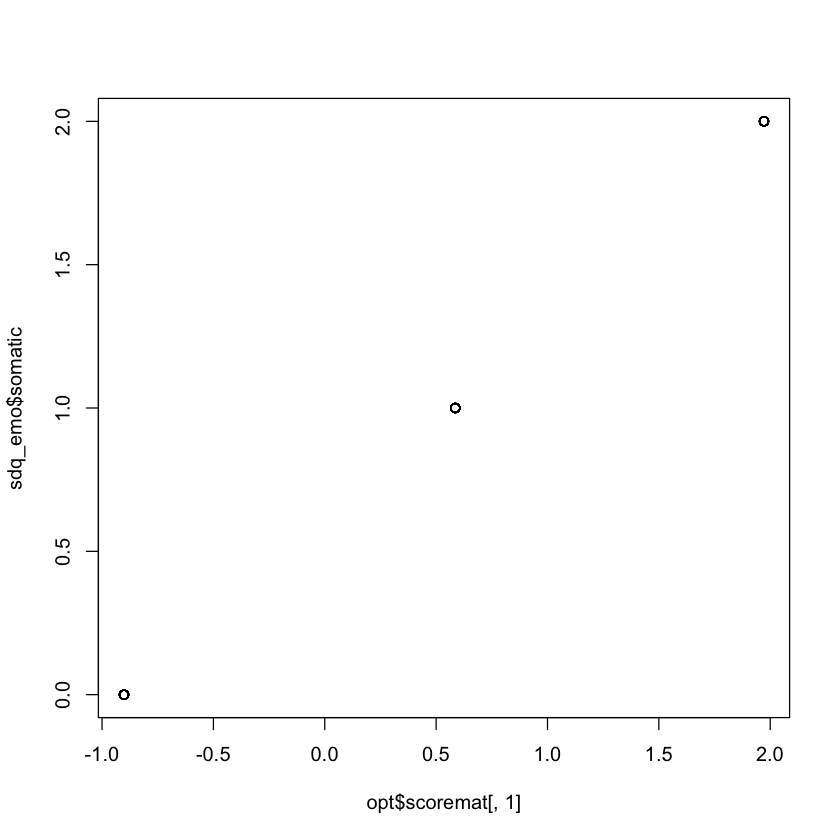

In [13]:
plot(opt$scoremat[, 1], sdq_emo$somatic)

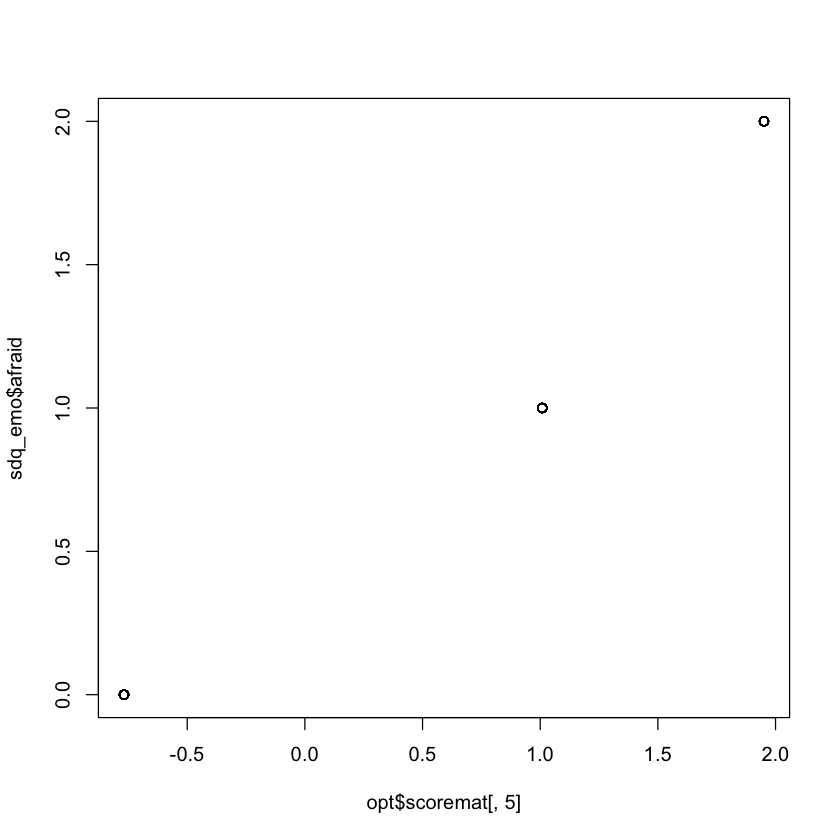

In [14]:
plot(opt$scoremat[, 5], sdq_emo$afraid)

Guardando ai grafici ottenuti, si può notare che 1) i punteggi per le categorie successive aumentano quasi linearmente; 2) le categorie sono approssimativamente equidistanti. Concludiamo che per la valutazione degli item ordinali nella scala dei Sintomi Emotivi del SDQ, la scala Likert è appropriata, e non si può ottenere molto di più dall'ottimizzazione della scala rispetto alla semplice scala Likert di base.

## Session Info

In [15]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] aspect_1.0-6       ggokabeito_0.1.0   viridis_0.6.5      viridisLite_0.4.2 
 [5] ggpubr_0.6.0       ggExtra_0.10.1     bayesplot_1.11.1   gridExtra_2.3     
 [9] patchwork_1.2.0    semTools_0.5-6.920 semPlot_1.1.6      lavaan_0.6-17     
[13] psych_2.4.1        scales_1.3.0       markdown_1.12      knitr_1.45        
[17] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.1      dplyr_1.1.4       
[21] purr